In [3]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\keena\Documents\University\python_scripts")

from Function_files.addresses import Init_Directories
import Function_files.data_functions as df

from Function_files.plotting_class import Plotter

import os

plt = Plotter()
dirs = Init_Directories()

import matplotlib.pyplot as mp
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.integrate import simpson
from scipy.optimize import curve_fit
import pandas as pd
import math



##### Set Directory and Args
        
        Define the directory to extract files from and provide discriminators


In [ ]:
directory = r'C:\Users\ms2316\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\Single Feature'
folder = '10122024'

path = os.path.join(directory, folder)
exts = ('.csv')
exceptions = ['.png', '.json']

# interogate directory to extract folder and file names
folder_list, file_list = df.dir_interrogate(path, exts, exceptions)

# create file paths
paths = []
for n, folder in enumerate(folder_list):
    temp = []
    temp_path = os.path.join(path, folder)
    for file in file_list[n]:
        temp.append(os.path.join(temp_path, file))
    paths.append(temp)

excel_files = [[df.open_excel(file) for file in folder] for folder in paths]

AttributeError: module 'Function_files.data_functions' has no attribute 'dir_interogate'

In [ ]:
file_list
folder_list

In [ ]:
def AOM_WCP_606_Efficiency(Sine_Voltage, Single_Pass_Power):
    Efficiency = 0.7062527710009873 * np.exp(-(Sine_Voltage - 231.74917120201272)**2 / (2 * 72.06094381524552**2))
    Power = Single_Pass_Power * Efficiency
    return Power

In [ ]:
def AOM_Prep_606_Efficiency(Sine_Voltage, Single_Pass_Power):
    Efficiency = 0.6344733319458099 * np.exp(-(Sine_Voltage - 235.2485990922679)**2 / (2 * 72.45100268498064**2))
    Power = Single_Pass_Power * Efficiency
    return Power

In [ ]:
Sine_Voltage_linespace = np.linspace(50, 200, 15)
Power_list = []
sine_Voltage_list = []
for i , Sine_Voltage_linespace in enumerate(Sine_Voltage_linespace):
    Power_list.append(AOM_Prep_606_Efficiency(Sine_Voltage_linespace, 10))
    sine_Voltage_list.append(Sine_Voltage_linespace)

Power_list

In [ ]:
file_list

In [ ]:

q_ref_max, qq_ref_max = [], []
i, w = 3, 1
for pp in range(len(excel_files[i][w][:,0])):
    
    x_first, y_first = excel_files[i][w][0,0], excel_files[i][w][0,2]
    x_last, y_last = excel_files[i][w][-1,0], excel_files[i][w][-1,2]
    slope = (y_last - y_first) / (x_last - x_first)
    baseline = slope * excel_files[i][w][pp,0]
    q_ref_max.append(excel_files[i][w][pp,0] * 2000)
    qq_ref_max.append((excel_files[i][w][pp,2] - baseline) - excel_files[i][w][0,2])
mp.plot(q_ref_max, qq_ref_max, label='Max Transmission')

q_ref_min, qq_ref_min = [], []
i, w = 3, 2
for pp in range(len(excel_files[i][w][:,0])):
    x_first, y_first = excel_files[i][w][0,0], excel_files[i][w][0,2]
    x_last, y_last = excel_files[i][w][-1,0], excel_files[i][w][-1,2]
    slope = (y_last - y_first) / (x_last - x_first)
    baseline = slope * excel_files[i][w][pp,0]
    
    
    q_ref_min.append(excel_files[i][w][pp,0] * 2000)
    qq_ref_min.append((excel_files[i][w][pp,2]  - baseline) - excel_files[i][w][0,2])
mp.plot(q_ref_min, qq_ref_min, label='Max Absorption')

#mp.gca().invert_yaxis()
mp.xlabel('Frequency (MHz)')
mp.title('Pit')
mp.ylabel('Voltage (V)')
mp.legend()
mp.show()

mp.figure() 

q, qq = [], []
for pp in range(len(q_ref_max)):
    if -5.9< q_ref_max[pp] < 5.9:
        q.append(q_ref_max[pp])
        qq.append(np.log(qq_ref_max[pp]/qq_ref_max[pp]))
mp.plot(q, qq, label='Max Transmission')

q, qq = [], []
for pp in range(len(q_ref_max)):
    if -1.9< q_ref_max[pp] < 1.9:
        q.append(q_ref_min[pp])
        qq.append(np.log(qq_ref_max[pp]/qq_ref_min[pp]))
mp.plot(q, qq, label='Max Absorption')


#mp.gca().invert_yaxis()
mp.xlabel('Frequency (MHz)')
mp.title('Pit')
mp.ylabel('OD')
mp.legend()
mp.show()

In [ ]:
x = excel_files[i][w][:,0] 
y = excel_files[i][w][:,2]

x_first, y_first = excel_files[i][w][0,0], excel_files[i][w][0,2]
x_last, y_last = excel_files[i][w][-1,0], excel_files[i][w][-1,2]
slope = (y_last - y_first) / (x_last - x_first)
intercept = y_first - slope * x_first
baseline = slope * x + intercept
y_corrected = y - baseline

mp.plot(x, y, label='Original Data')
mp.plot(x, baseline, label='Baseline', linestyle='--')
mp.plot(x, y_corrected, label='Corrected Data')
mp.xlabel('X Axis Label')
mp.ylabel('Y Axis Label')
mp.title('Baseline Correction')
mp.legend()
mp.show()


In [ ]:
i = 1
for w in range(len(file_list[i])):
    q_ref, qq_ref = [], []
    for pp in range(len(excel_files[i][w][:,0])):
        x_first, y_first = excel_files[i][w][0,0], excel_files[i][w][0,2]
        x_last, y_last = excel_files[i][w][-1,0], excel_files[i][w][-1,2]
        slope = (y_last - y_first) / (x_last - x_first)
        baseline = slope * excel_files[i][w][pp,0]
        q_ref.append(excel_files[i][w][pp,0] * 2000)
        qq_ref.append(excel_files[i][w][pp,2] - excel_files[i][w][0,2] - baseline)
    q, qq = [], []
    for p in range(len(q_ref)):
        if -1.99< q_ref[p] < 1.99:
            q.append(q_ref[p])
            qq.append(np.log(qq_ref_max[p]/qq_ref[p]))

    mp.plot(q, qq)
    mp.gca().invert_yaxis()
    mp.xlabel('Frequency (MHz)')
    #mp.legend()
    mp.title('Single pulse feature            SP amplitude: {:.3f} mV'.format(sine_Voltage_list[w]))
    mp.ylabel('OD')
    #mp.ylim(0, 6)
    mp.show()

In [ ]:
# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev, B):
    return -amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2) + B

i = 6
FWHM_list = []
for w in range(len(Power_list)):
    if w > -1:
        q_ref, qq_ref = [], []
        for pp in range(len(excel_files[i][w][:,0])):
            x_first, y_first = excel_files[i][w][0,0], excel_files[i][w][0,2]
            x_last, y_last = excel_files[i][w][-1,0], excel_files[i][w][-1,2]
            slope = (y_last - y_first) / (x_last - x_first)
            baseline = slope * excel_files[i][w][pp,0]
            if -0.002< excel_files[i][w][pp,0] < 0.002:
                q_ref.append(excel_files[i][w][pp,0] * 2000)
                qq_ref.append(excel_files[i][w][pp,2] - excel_files[i][w][0,2] - baseline)
        q, qq = [], []
        for p in range(len(q_ref)):
            if -1.5< q_ref[p] < 1.95:
                q.append(q_ref[p])
                qq.append(np.log(qq_ref_max[p]/qq_ref[p]))
    
        # Initial guess for amplitude, mean, stddev, and B
        initial_guess =  [0.5, 0, 0.05, 1.5]
        params, covariance = curve_fit(gaussian, q, qq, p0=initial_guess)
        amp_opt, mean_opt, stddev_opt, B_Opt = params
        fwhm = 2.355 * stddev_opt
        FWHM_list.append(fwhm * 10**3)
        
        mp.plot(q, qq, label='Measured data')
        mp.plot(q, gaussian(q, amp_opt, mean_opt, stddev_opt, B_Opt), label='Gaussian fit', color='red')
        mp.xlabel('Frequency (MHz)')
        mp.ylabel('OD')
        #mp.title('Single pulse feature      SP amplitude: {:.3f} mV'.format(Sine_voltage_list_1ms[w]))
        mp.title('Gaussian Fit       FWHM: {:.1f} KHz        SP amplitude: {:.3f} mV'.format(fwhm * 1e3, sine_Voltage_list[w]))
        mp.gca().invert_yaxis()
        mp.legend()
        mp.grid(True)
        mp.show()

In [ ]:
FWHM_list

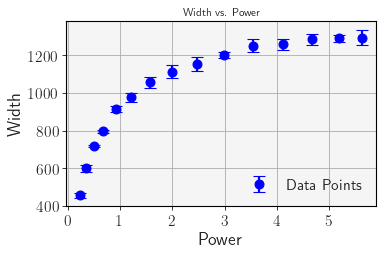

In [5]:
power_list = [0.24142524527109377,
 0.3485371785822177,
 0.49228631658597927,
 0.6802814690458676,
 0.9197329392646834,
 1.2165698899164439,
 1.57439829089997,
 1.9933996562448966,
 2.469314301241332,
 2.99268211051148,
 3.5485181153139504,
 4.116571746617962,
 4.672255399681363,
 5.188235529347973,
 5.636571436577574]

width_list1 = [473.4351380419072,
 621.7393743571057,
 725.3004252890748,
 805.8799618519338,
 929.0366011702041,
 1007.4315373242584,
 1096.18638263333,
 1157.9011250403619,
 1194.2710716288636,
 1220.415314844436,
 1298.598983162134,
 1300.0430566422604,
 1322.202286570296,
 1315.6112406142634,
 1353.1992071413056]
width_list2 = [440.4516079788628,
 601.4062372068329,
 712.7818230581828,
 789.9610141722851,
 920.0806331139011,
 951.7755100057306,
 1035.9059110096703,
 1080.9165436546696,
 1103.2124402410755,
 1184.0530252737153,
 1236.5419469057024,
 1244.5162450331943,
 1257.8373303720132,
 1288.0502726429627,
 1270.1006437170859]
width_list3 = [456.28573237852856,
 577.9307085657607,
 716.7735542860818,
 794.3505678245602,
 896.118600642917,
 973.6790300769364,
 1038.455553051307,
 1105.3009041819314,
 1164.0016967158713,
 1200.762092413576,
 1218.7147076232636,
 1234.571112443031,
 1276.1898489515763,
 1271.2083134019647,
 1260.8021106936799]

width_arrays = np.array([width_list1, width_list2, width_list3])

avg_width = np.mean(width_arrays, axis=0)

FWHM_list_avg = avg_width.tolist() 

std_width = np.std(width_arrays, axis=0)

mp.figure(figsize=(5, 3))

mp.errorbar(power_list, avg_width, yerr=std_width, fmt='o', label='Data Points', color='blue', capsize=5)

mp.xlabel('Power')
mp.ylabel('Width')
mp.title('Width vs. Power')
mp.grid(True)
mp.legend()
mp.show()


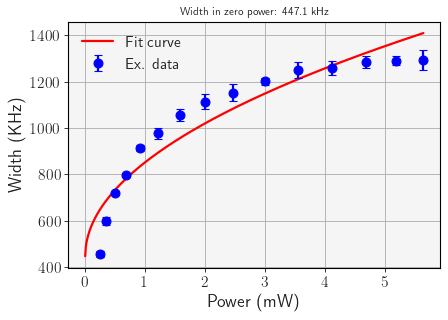

In [6]:

def power_func(x, a, b):
    return a + (b * x**0.5)

initial_guess = [20, 0.01]

popt, pcov = curve_fit(power_func, power_list, FWHM_list_avg, p0=initial_guess)

x_fit = np.linspace(0, max(power_list) + 0, 500)
y_fit = power_func(x_fit, *popt)

mp.plot(x_fit, y_fit, label='Fit curve', color='r')

y_intercept = power_func(0, *popt)

mp.errorbar(power_list, avg_width, yerr=std_width, fmt='o', label='Ex. data', color='blue', capsize=4)

mp.xlabel('Power (mW)')
mp.ylabel('Width (KHz)')
mp.title('Width in zero power: ' + str(round(y_intercept,1))+ ' kHz ')

mp.legend()
mp.grid(True)
#mp.xlim(,0.1)
#mp.ylim(-10, 1200)

file_name = 'Width' + '.png'

mp.show()
